# L'Optimisation des Hyperparamètres (OHP) des modèles d'apprentissage automatique
L'optimisation des hyperparamètres (OHP) en apprentissage automatique consiste à trouver les meilleures valeurs pour les paramètres externes d'un modèle, appelés hyperparamètres.


 L'OHP est une étape cruciale dans le développement de modèles d'apprentissage automatique performants.

**Ensemble de données utilisé :**
Boston Housing dataset

**Algorithmes d'apprentissage automatique utilisés :**

Forêt aléatoire (RF), machine à vecteurs de support (SVM), k-plus proches voisins (KNN).

Algorithmes d'optimisation des hyperparamètres (OHP) utilisés :
Grid search, random search , Bayesian Optimization with Gaussian Processes (BO-GP),algorithme génétique (GA).

**Mesure de performance :**
Erreur quadratique moyenne (MSE)

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

 Charger le jeu de données Boston à partir du fichier CSV

In [2]:
df = pd.read_csv('boston.csv')

Séparer les caractéristiques (X) et la variable cible (y)

In [3]:
X = df.drop('MEDV', axis=1)  # X contient toutes les colonnes sauf 'MEDV'
y = df['MEDV']  # y contient la colonne 'MEDV'

In [4]:
# Afficher les premières lignes du DataFrame
print(df.head())

      CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [5]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# HPO Algorithm 1: Grid Search
**Stratégie de Recherche :** Explore de manière exhaustive toutes les combinaisons d'hyperparamètres dans une grille prédéfinie.

**Quelques points essentiels à noter concernant l'implémentation de GridSearchCV dans scikit-learn :**

**Format des paramètres**

Les hyperparamètres doivent être spécifiés sous la forme d'une distribution ou d'une grille avec des paires clé-valeur, similaire à un dictionnaire.

**Validation croisée:**

 GridSearchCV réalise une validation croisée pour prévenir le surajustement du modèle. Par défaut, il utilise StratifiedKFold pour les problèmes de classification et KFold pour les problèmes de régression.

**Méthode utile**

  GridSearchCV propose des méthodes pratiques telles que predict_proba pour prédire des probabilités, best_score_ pour obtenir le meilleur score, best_params_ pour récupérer les meilleurs paramètres appris par le modèle.

**Choix du critère de scoring**
 Vous avez également la possibilité de définir le paramètre de scoring selon vos préférences, ce qui permet une personnalisation selon les objectifs spécifiques du problème.

**Random Forest**

In [6]:
# Hyperparamètres pour le modèle Random Forest
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [15, 20, 30, 50],
}

# Initialisation du modèle Random Forest
rf_regressor = RandomForestRegressor(random_state=0)

# Recherche des meilleurs hyperparamètres avec GridSearchCV
rf_grid = GridSearchCV(rf_regressor, rf_params, cv=3, scoring='neg_mean_squared_error')
%time rf_grid.fit(X_train, y_train)
# Print best parameters and MSE for each algorithm
print("Random Forest - Best Parameters:", rf_grid.best_params_)
print("Random Forest - MSE:", -rf_grid.best_score_)

CPU times: user 2.13 s, sys: 1.19 ms, total: 2.14 s
Wall time: 2.14 s
Random Forest - Best Parameters: {'max_depth': 20, 'n_estimators': 20}
Random Forest - MSE: 16.568739887547853


**Interprétation :** Les résultats indiquent que le modèle Random Forest atteint sa meilleure performance avec une profondeur maximale (max_depth) de 20 et 20 estimateurs (n_estimators). Le MSE associé est relativement bas, ce qui suggère une bonne adéquation aux données.

 **SVM**

In [7]:
# Hyperparamètres pour le modèle SVM
svm_params = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'epsilon': [0.01, 0.1, 1],
}

# Initialisation du modèle SVM
svm_regressor = SVR(gamma='scale')

# Recherche des meilleurs hyperparamètres avec GridSearchCV
svm_grid = GridSearchCV(svm_regressor, svm_params, cv=3, scoring='neg_mean_squared_error')
%time svm_grid.fit(X_train, y_train)

print("\nSVM - Best Parameters:", svm_grid.best_params_)
print("SVM - MSE:", -svm_grid.best_score_)

CPU times: user 1.04 s, sys: 344 µs, total: 1.04 s
Wall time: 1.05 s

SVM - Best Parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
SVM - MSE: 49.3802779669561


**Interprétation :** Les résultats pour le modèle SVM indiquent que les meilleurs hyperparamètres incluent un paramètre de régularisation (C) élevé de 100, une petite marge epsilon (0.01) et un noyau rbf (Radial Basis Function).

**KNN**

In [11]:
# Hyperparamètres pour le modèle k-NN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Initialisation du modèle k-NN
knn_regressor = KNeighborsRegressor()

# Recherche des meilleurs hyperparamètres avec GridSearchCV
knn_grid = GridSearchCV(knn_regressor, knn_params, cv=3, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le MSE associé
print("\nk-NN - Best Parameters:", knn_grid.best_params_)
print("k-NN - MSE:", -knn_grid.best_score_)


k-NN - Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
k-NN - MSE: 29.818211396400187


**Interprétation :** Pour le modèle KNN, le nombre optimal de voisins (n_neighbors) est trouvé à 5, avec un MSE associé. Le KNN semble performant, bien que son MSE soit intermédiaire par rapport aux autres modèles.

**Grid Search**
Grid Search peut être coûteux en temps de calcul,
évalue les performances du modèle pour chaque combinaison d'hyperparamètres à l'aide de la validation croisée et sélectionne la combinaison qui offre les meilleures performances.

### HPO Algorithm 2: Random Search



**Stratégie de Recherche :** Échantillonne de manière aléatoire des combinaisons d'hyperparamètres à partir d'une distribution prédéfinie.
**Points clés à noter sur l'implémentation de RandomizedSearchCV dans scikit-learn :**

1-Spécifiez les hyperparamètres sous forme de distribution ou de grille avec des paires clé-valeur, comme dans un dictionnaire.

2-Effectue une validation croisée pour éviter le surajustement du modèle.

3-Par défaut, utilise une validation croisée StratifiedKFold pour les problèmes de classification et KFold pour les problèmes de régression.

4-Fournit des méthodes telles que predict_proba si vous souhaitez prédire des probabilités, best_score_ pour obtenir le meilleur score, best_params_ pour récupérer les meilleurs paramètres appris par le modèle.

5-Permet de définir le nombre de combinaisons de paramètres à évaluer, défini par n_iter.

6-Vous pouvez également définir le paramètre de scoring selon vos préférences.


#Random Forest

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Random Forest
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [15, 20, 30, 50],
}

rf_regressor = RandomForestRegressor(random_state=0)
rf_grid = GridSearchCV(rf_regressor, rf_params, cv=3, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
print("Random Forest - Best Parameters:", rf_grid.best_params_)
print("Random Forest - MSE:", -rf_grid.best_score_)

Random Forest - Best Parameters: {'max_depth': 20, 'n_estimators': 20}
Random Forest - MSE: 16.568739887547853


In [9]:

# Hyperparamètres pour le modèle SVM
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.01, 0.1, 1],
}

# Initialisation du modèle SVM
svm_regressor = SVR(gamma='scale')

# Recherche des meilleurs hyperparamètres avec GridSearchCV
svm_grid = GridSearchCV(svm_regressor, svm_params, cv=3, scoring='neg_mean_squared_error')
svm_grid.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le MSE associé
print("\nSVM - Best Parameters:", svm_grid.best_params_)
print("SVM - MSE:", -svm_grid.best_score_)


SVM - Best Parameters: {'C': 10, 'epsilon': 1, 'kernel': 'linear'}
SVM - MSE: 26.435891420079557


In [10]:
# Hyperparamètres pour le modèle k-NN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Initialisation du modèle k-NN
knn_regressor = KNeighborsRegressor()

# Recherche des meilleurs hyperparamètres avec GridSearchCV
knn_grid = GridSearchCV(knn_regressor, knn_params, cv=3, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le MSE associé
print("\nk-NN - Best Parameters:", knn_grid.best_params_)
print("k-NN - MSE:", -knn_grid.best_score_)


k-NN - Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
k-NN - MSE: 29.818211396400187


Cette configuration indique que le modèle k-NN considère les cinq voisins les plus proches, utilise la distance de Manhattan pour mesurer la proximité, et attribue des poids décroissants en fonction inverse de la distance.

Le MSE de 29.82 mesure l'erreur moyenne dans les prédictions,

**Quelques différences entre les implémentations de RandomizedSearchCV et GridSearchCV sont les suivantes :**

**Dans RandomizedSearchCV**, toutes les combinaisons d'hyperparamètres ne sont pas explorées (cela est défini par n_iter), tandis que dans GridSearchCV, toutes les combinaisons possibles sont recherchées.


**GridSearchCV** prend significativement plus de temps que RandomizedSearchCV en raison du grand nombre de combinaisons.

# L'Optimisation Bayésienne avec Processus Gaussiens (BO-GP)

L'Optimisation Bayésienne avec Processus Gaussiens (BO-GP) est une méthode efficace pour trouver les meilleurs paramètres d'une fonction coûteuse, telle que les hyperparamètres d'un modèle d'apprentissage automatique. Elle utilise un modèle probabiliste, le Processus Gaussien, pour guider la recherche en équilibrant l'exploration et l'exploitation, et ainsi trouver rapidement les paramètres optimaux. C'est particulièrement utile lorsque les évaluations sont coûteuses en temps ou en ressources.

In [ ]:
!pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.6 MB/s eta 0:00:00



Random Forest - Best Parameters: OrderedDict([('max_depth', 29), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 128)])
Random Forest - Best MSE: 16.20067073050366
Random Forest - Test MSE: 8.70474323347504


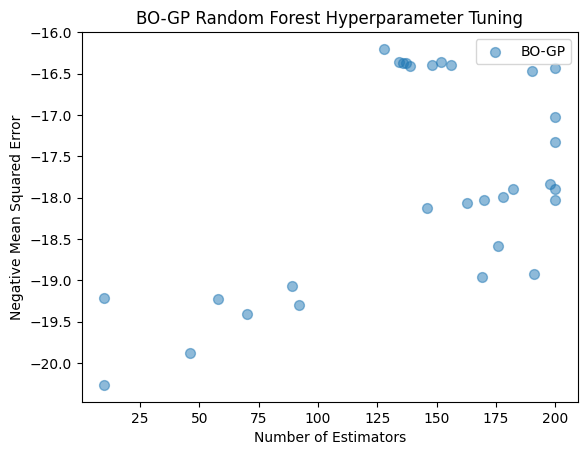

In [ ]:
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
# Définir l'espace des hyperparamètres à explorer
param_space = {
    'n_estimators': (10, 200),
    'max_depth': (5, 50),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10)
}

# Initialisation du modèle Random Forest
rf_regressor = RandomForestRegressor(random_state=0)

# Initialisation de l'optimisation bayésienne avec processus gaussiens (BO-GP)
opt = BayesSearchCV(rf_regressor, param_space, n_iter=30, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Recherche des meilleurs hyperparamètres
opt.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("\nRandom Forest - Best Parameters:", opt.best_params_)
print("Random Forest - Best MSE:", -opt.best_score_)

# Prédiction sur l'ensemble de test avec les meilleurs paramètres
y_pred = opt.predict(X_test)

# Calculer et afficher le MSE sur l'ensemble de test
test_mse = mean_squared_error(y_test, y_pred)
print("Random Forest - Test MSE:", test_mse)

# Visualisation des résultats
results = pd.DataFrame(opt.cv_results_)
results.plot(x='param_n_estimators', y='mean_test_score', kind='scatter', alpha=0.5, s=50, c='C0', label='BO-GP')
plt.xlabel('Number of Estimators')
plt.ylabel('Negative Mean Squared Error')
plt.title('BO-GP Random Forest Hyperparameter Tuning')
plt.show()


k-NN - Best Parameters: OrderedDict([('n_neighbors', 7), ('p', 2), ('weights', 'distance')])
k-NN - Best MSE: 36.26637045890014
k-NN - Test MSE: 22.416435268953336


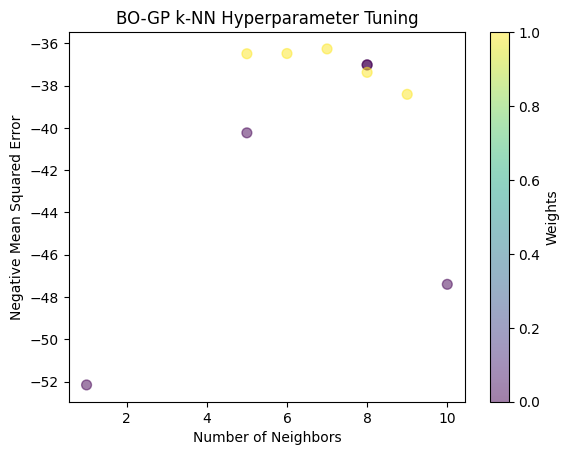

In [ ]:

# Définir l'espace des hyperparamètres à explorer pour le modèle k-NN
param_space = {
    'n_neighbors': (1, 10),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialisation du modèle k-NN
knn_regressor = KNeighborsRegressor()

# Initialisation de l'optimisation bayésienne avec processus gaussiens (BO-GP)
opt = BayesSearchCV(knn_regressor, param_space, n_iter=10, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Recherche des meilleurs hyperparamètres
opt.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("\nk-NN - Best Parameters:", opt.best_params_)
print("k-NN - Best MSE:", -opt.best_score_)

# Prédiction sur l'ensemble de test avec les meilleurs paramètres
y_pred = opt.predict(X_test)

# Calculer et afficher le MSE sur l'ensemble de test
test_mse = mean_squared_error(y_test, y_pred)
print("k-NN - Test MSE:", test_mse)

# Visualisation des résultats
results = pd.DataFrame(opt.cv_results_)
results['param_weights'] = results['param_weights'].map({'uniform': 0, 'distance': 1})

plt.scatter(x=results['param_n_neighbors'], y=results['mean_test_score'], c=results['param_weights'], cmap='viridis', alpha=0.5, s=50)
plt.colorbar(label='Weights')
plt.xlabel('Number of Neighbors')
plt.ylabel('Negative Mean Squared Error')
plt.title('BO-GP k-NN Hyperparameter Tuning')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


# Définir l'espace des hyperparamètres à explorer pour le modèle SVM
param_space = {
    'C': (0.1, 100),
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': (0.01, 1)
}

# Initialisation du modèle SVM
svm_regressor = SVR(gamma='scale')

# Initialisation de l'optimisation bayésienne avec processus gaussiens (BO-GP)
opt = BayesSearchCV(svm_regressor, param_space, n_iter=30, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Recherche des meilleurs hyperparamètres
opt.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("\nSVM - Best Parameters:", opt.best_params_)
print("SVM - Best MSE:", -opt.best_score_)

# Prédiction sur l'ensemble de test avec les meilleurs paramètres
y_pred = opt.predict(X_test)

# Calculer et afficher le MSE sur l'ensemble de test
test_mse = mean_squared_error(y_test, y_pred)
print("SVM - Test MSE:", test_mse)

# Visualisation des résultats
results = pd.DataFrame(opt.cv_results_)
results.plot.scatter(x='param_C', y='mean_test_score', c='param_kernel', colormap='viridis', alpha=0.5, s=50)
plt.xlabel('C')
plt.ylabel('Negative Mean Squared Error')
plt.title('BO-GP SVM Hyperparameter Tuning')
plt.show()

# Interprétation
**Grid Search :**

Interprétation : Exploration exhaustive des combinaisons d'hyperparamètres prédéfinies.
Avantages : Simplicité, transparence, exploration exhaustive.
Inconvénients : Coûteuse en calculs, inefficace pour des espaces larges.


**Random Search :**

Interprétation : Exploration aléatoire d'hyperparamètres sans grille prédéfinie.
Avantages : Efficace pour des espaces vastes, moins coûteuse.
Inconvénients : Moins transparente, pas d'exploration exhaustive garantie.


**BO-GP (Optimisation Bayésienne avec Processus Gaussien) :**

Interprétation : Utilisation d'un modèle probabiliste pour guider l'exploration d'hyperparamètres.
Avantages : Efficace pour espaces complexes, convergence rapide.
Inconvénients : Coûteuse en calculs, nécessite une compréhension avancée.


# Conclusion :

Grid Search : Simple mais coûteuse.
Random Search : Efficace pour des espaces larges.
BO-GP : Puissante pour espaces complexes, mais coûteuse. Choix dépend des ressources et de la complexité.